In [1]:
# Trying to experiment with reading pickle files
import pickle
import os
import numpy as np

# Loading data and store it to variables

In [2]:
# Root dir to the project, adjust this your own project path
rootdir = 'C:/Users/User/Downloads/angewandte-ki-cog-village/data/training/'

# data event variable is sensor dict data
# data label event variable is based on the file name, extracted with string split
data             = []
data_label       = []
data_label_text  = []


for subdir, dirs, files in os.walk(rootdir):
    for fl in files:
        if fl.endswith('.pkl'):
            # string split for event labelling
            str_arr = fl.split('_')
            label   = str_arr[1]

            # read data and append it to variable
            infile = open((rootdir + fl),'rb')
            new_dict = pickle.load(infile, encoding='latin1')

            data.append(new_dict)
            data_label.append(new_dict['label'])
            data_label_text.append(label)


# Reading data

In [3]:
# Read data data[index] example
# print(data[500])

# Get keys list
# print(data[500].keys())

# Get key value inside dict object
# print(data[500]['subject'])
# print(data[500]['Magnetometer'])
# print(data[500]['label'])

# Get shape
# print(data[500]['Magnetometer'].shape)

# Get label
# print(data_label)

# Data structure

In [4]:
selected_data = data[0]
keys = data[0].keys()

for key in keys:
    print(key,':',type(selected_data[key]))
    if type(selected_data[key]) is np.ndarray:
        print(selected_data[key].shape)
    else:
        print(selected_data[key])


Magnetometer : <class 'numpy.ndarray'>
(245, 3)
JinsBlinkSpeed : <class 'numpy.ndarray'>
(101, 1)
rightHand : <class 'bool'>
False
Accelerometer : <class 'numpy.ndarray'>
(982, 3)
MSGyroscope : <class 'numpy.ndarray'>
(307, 3)
MSAccelerometer : <class 'numpy.ndarray'>
(307, 3)
JinsGyroscope : <class 'numpy.ndarray'>
(101, 3)
Gravity : <class 'numpy.ndarray'>
(1001, 3)
label : <class 'int'>
0
LinearAccelerometer : <class 'numpy.ndarray'>
(994, 3)
executionId : <class 'int'>
0
session : <class 'int'>
1
JinsAccelerometer : <class 'numpy.ndarray'>
(101, 3)
JinsBlinkStrength : <class 'numpy.ndarray'>
(101, 1)
JinsEyeMovement : <class 'numpy.ndarray'>
(101, 4)
Gyroscope : <class 'numpy.ndarray'>
(984, 3)
subject : <class 'int'>
1


# Plotting testing

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Magnetometer

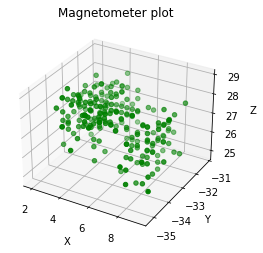

In [6]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

magnetometer = data[0]['Magnetometer']

x_vals = magnetometer[:, 0]
y_vals = magnetometer[:, 1]
z_vals = magnetometer[:, 2]

ax.scatter(x_vals, y_vals, z_vals, c='g')

ax.set_title('Magnetometer plot')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Accelerometer with comparing activity example

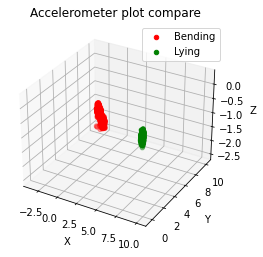

In [7]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data index 0 is bending, label = 0
accelerometerOne = data[0]['Accelerometer']

x_vals_one = accelerometerOne[:, 0]
y_vals_one = accelerometerOne[:, 1]
z_vals_one = accelerometerOne[:, 2]

# Data index 20 is drink, label = 16
accelerometerTwo = data[20]['Accelerometer']

x_vals_two = accelerometerTwo[:, 0]
y_vals_two = accelerometerTwo[:, 1]
z_vals_two = accelerometerTwo[:, 2]

ax.scatter(x_vals_one, y_vals_one, z_vals_one, c='r', label = 'Bending')
ax.scatter(x_vals_two, y_vals_two, z_vals_two, c='g', label = 'Lying')

ax.set_title('Accelerometer plot compare')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()

plt.show()

## Trying to plot plotable data of an activity e.g. Bending

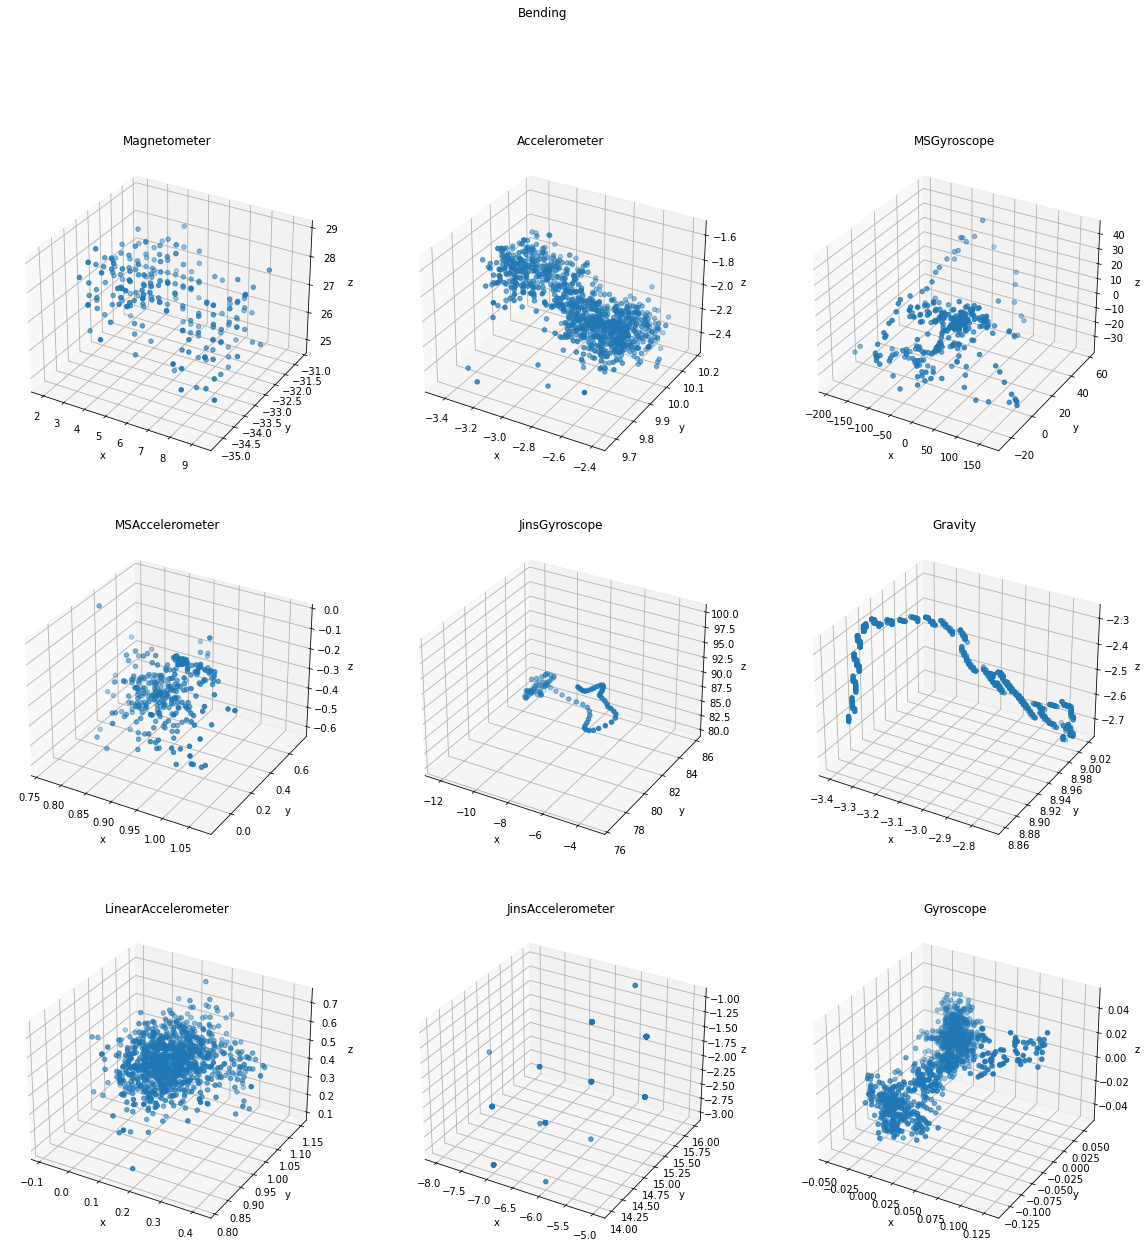

In [8]:
# TODO find out how to plot (n, 4) JinsEyeMovement sensor data - maybe through reshape?
# TODO find out how to plot (n, 1) JinsBlinkStrength sensor data 

selected_data = data[0]
keys = data[0].keys()

# Prepare the plot
fig = plt.figure(figsize=(20,20))
fig.suptitle('Bending')
ax  = dict()

index = 1

for key in keys:
    if type(selected_data[key]) is np.ndarray:
        # If data is 3d array type
        if selected_data[key].shape[1] == 3:

            x_vals = selected_data[key][:,0]
            y_vals = selected_data[key][:,1]
            z_vals = selected_data[key][:,2]

            ax[index] = fig.add_subplot(3, 3, index, projection='3d')

            ax[index].set_title(key)
            ax[index].set_xlabel('x')
            ax[index].set_ylabel('y')
            ax[index].set_zlabel('z')

            ax[index].scatter(x_vals, y_vals, z_vals)

            index = index + 1



# Test concatenate data per activity

In [9]:
# Root dir to the project, adjust this your own project path
rootdir = 'C:/Users/User/Downloads/angewandte-ki-cog-village/data/training/'

# data event variable is sensor dict data
# data label event variable is based on the file name, extracted with string split
data             = []
data_label       = []
data_label_text  = []


for subdir, dirs, files in os.walk(rootdir):
    for fl in files:
        if fl.endswith('.pkl'):
            # string split for event labelling
            str_arr = fl.split('_')
            label   = str_arr[1]

            # read data and append it to variable
            infile = open((rootdir + fl),'rb')
            new_dict = pickle.load(infile, encoding='latin1')

            data.append(new_dict)
            data_label.append(new_dict['label'])
            data_label_text.append(label)

In [10]:
from collections import defaultdict

keys = list(data[0].keys())

# Remove duplicates
unique_data_label = list(set(data_label))

activity_multi_array = []
activity_multi_label = unique_data_label

for label in unique_data_label:
    data_total = defaultdict(list)
    
    for dt in data:
        # Due to some data don't have all keys
        keys = list(dt.keys())
        if dt['label'] == label:
            for k in keys:
                data_total[k].append(dt[k])
                
    for k in keys:
        data_total[k] = np.vstack(data_total[k])
    
    activity_multi_array.append(data_total)



In [11]:
import numpy as np
import pandas as pd

keys = [
    'Magnetometer', 
    'Accelerometer', 
    'LinearAccelerometer', 
    'JinsGyroscope', 
    'Gravity', 
    'MSAccelerometer',
    'JinsAccelerometer',
    'MSGyroscope',
    'Gyroscope',
    'JinsEyeMovement',
    # 'JinsBlinkStrength',
    'rightHand',
    'label'
]

ary = []
for dt in data:
    internal = []
    for key in keys[:-2]:
        feature = dt[key]
        for column in feature.T:
            internal.append(np.mean(column))
            internal.append(np.var(column))
            internal.append(np.max(column))
            internal.append(np.min(column))
    # Right hand - If true 1 else 0
    right_hand = 1 if dt["rightHand"] else 0
    internal.append(right_hand)

    internal.append(dt["label"])

    ary.append(internal)

In [12]:
df = pd.DataFrame(ary)

# Name df columns, so it's more clear
df_columns = []

# Iterate through except label, rightHand, JinsEyeMovement, JinsBlinkStrength
for key in keys[:-3]:
    df_columns.append('{} X (mean)'.format(key))
    df_columns.append('{} X (var)'.format(key))
    df_columns.append('{} X (max)'.format(key))
    df_columns.append('{} X (min)'.format(key))

    df_columns.append('{} Y (mean)'.format(key))
    df_columns.append('{} Y (var)'.format(key))
    df_columns.append('{} Y (max)'.format(key))
    df_columns.append('{} Y (min)'.format(key))

    df_columns.append('{} Z (mean)'.format(key))
    df_columns.append('{} Z (var)'.format(key))
    df_columns.append('{} Z (max)'.format(key))
    df_columns.append('{} Z (min)'.format(key))

# JinsEyeMovement (4 dimensions)
for i in range(4):
    df_columns.append('JinsEyeMovement Dim-{} (mean)'.format(i+1))
    df_columns.append('JinsEyeMovement Dim-{} (var)'.format(i+1))
    df_columns.append('JinsEyeMovement Dim-{} (max)'.format(i+1))
    df_columns.append('JinsEyeMovement Dim-{} (min)'.format(i+1))

df_columns.append('rightHand')

df_columns.append('label')

df.columns = df_columns

df

,Magnetometer X (mean),Magnetometer X (var),Magnetometer X (max),Magnetometer X (min),Magnetometer Y (mean),Magnetometer Y (var),Magnetometer Y (max),Magnetometer Y (min),Magnetometer Z (mean),Magnetometer Z (var),...,JinsEyeMovement Dim-3 (mean),JinsEyeMovement Dim-3 (var),JinsEyeMovement Dim-3 (max),JinsEyeMovement Dim-3 (min),JinsEyeMovement Dim-4 (mean),JinsEyeMovement Dim-4 (var),JinsEyeMovement Dim-4 (max),JinsEyeMovement Dim-4 (min),rightHand,label
0,4.991582,3.368823,9.3125,1.9375,-32.884439,0.634716,-31.1875,-35.2500,26.872449,0.663769,...,0.0,0.0,0.0,0.0,0.009901,0.009803,1.0,0.0,0,0
1,4.999238,7.892133,7.7500,-2.5625,-40.103659,1.256309,-37.8750,-43.4375,-1.536331,3.767433,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0
2,8.244621,33.212013,14.1250,-1.7500,-37.640113,1.081339,-35.2500,-40.8125,9.581711,26.765016,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0
3,8.289634,0.321695,9.6875,6.6875,-39.676829,0.765797,-37.8750,-41.9375,3.122967,1.000790,...,0.0,0.0,0.0,0.0,0.010000,0.009900,1.0,0.0,0,0
4,18.582317,0.217309,20.0000,17.3750,-39.456047,0.764281,-37.5000,-41.5625,-7.030488,0.467312,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,57.716972,143.881277,70.9375,23.0625,-8.623476,6.323994,-1.8125,-14.3125,54.860010,121.039457,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,5
255,60.309959,32.958549,72.0000,45.8750,-9.146341,3.963309,-3.6875,-13.9375,52.580285,101.322569,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,5
256,62.244157,22.920205,70.1875,49.9375,-10.478659,6.692094,-4.0625,-15.4375,52.757876,97.716036,...,0.0,0.0,0.0,0.0,0.010000,0.009900,1.0,0.0,0,5
257,62.617378,22.964754,72.7500,52.1250,-9.737551,7.747225,-3.3125,-16.5625,51.687246,73.808673,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,5


# Testing random forest classifier

In [13]:
y = df['label'].to_numpy()
# X = df[['Magnetometer X (mean)', 'Magnetometer Y (mean)', 'Magnetometer Z (mean)']].to_numpy() # Feature selection - TODO find out which features are the best
X = df.iloc[:, 0:(len(df.columns)-1)].to_numpy() # All features except label

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

# Cross fold validation - 10 folds
scores = cross_val_score(clf, X, y, cv=10)

# Scores value
print('cross fold validation scores:', scores)
print('cross fold validation score average', scores.mean())
print('cross fold validation score standard deviation', scores.std())

cross fold validation scores: [0.96153846 0.96153846 1.         0.92307692 0.92307692 1.
 0.96153846 1.         0.96153846 1.        ]
cross fold validation score average 0.9692307692307693
cross fold validation score standard deviation 0.02878197989826107


Confusion matrix:
[[17  0  0  0  0  0]
 [ 0 14  1  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  1 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 15]]


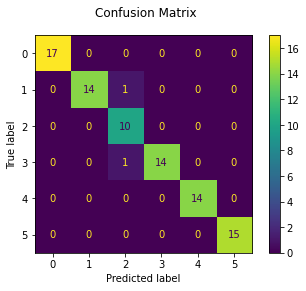

In [15]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# With standard scaler and pca

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = df['label'].to_numpy()
X = df.iloc[:, 0:(len(df.columns)-1)].to_numpy() # All features except label

# Standardizing the features
X = StandardScaler().fit_transform(X)

pca            = PCA(n_components=20)
pca_components = pca.fit_transform(X)

df_pca = pd.DataFrame(data = pca_components)

X = df_pca.iloc[:, 0:len(df_pca.columns)].to_numpy()
y = df['label'].to_numpy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

# Cross fold validation - 10 folds
scores = cross_val_score(clf, X, y, cv=10)

# Scores value
print('cross fold validation scores:', scores)
print('cross fold validation score average', scores.mean())
print('cross fold validation score standard deviation', scores.std())

cross fold validation scores: [0.76923077 0.96153846 0.84615385 0.84615385 0.92307692 0.92307692
 0.92307692 0.96153846 1.         1.        ]
cross fold validation score average 0.9153846153846154
cross fold validation score standard deviation 0.07050116453778214


In [18]:
# Testing logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000).fit(X_train, y_train)

predicted = clf.predict(X_test)

print(predicted)
print(y_test)

scores = cross_val_score(clf, X, y, cv=10)

# Scores value
print('cross fold validation scores:', scores)
print('cross fold validation score average', scores.mean())
print('cross fold validation score standard deviation', scores.std())


[5 3 0 5 0 3 1 3 5 1 1 2 5 5 3 3 0 2 2 4 2 4 1 4 2 2 5 2 4 0 1 1 5 0 0 3 4
 4 1 2 0 3 1 4 5 4 5 5 5 1 2 2 1 0 4 0 4 3 0 3 3 5 0 2 2 4 2 2 1 4 1 5 4 0
 0 5 0 4 3 2 0 2 5 0 2 0]
[5 3 0 5 0 3 1 3 5 1 1 2 5 5 3 3 0 2 2 4 2 4 1 4 3 1 5 3 4 0 1 1 5 0 0 3 4
 4 1 2 0 1 1 4 5 4 5 5 5 1 3 1 1 0 4 0 4 3 0 3 3 5 0 2 3 4 2 3 1 4 1 5 4 0
 0 5 0 4 3 2 0 2 5 0 2 0]
cross fold validation scores: [0.88461538 0.84615385 1.         0.88461538 0.96153846 0.88461538
 0.92307692 1.         0.96153846 1.        ]
cross fold validation score average 0.9346153846153846
cross fold validation score standard deviation 0.054528641841376256


In [19]:
# Testing SVM
from sklearn.svm import SVC

clf = SVC(gamma='auto', random_state=0).fit(X_train, y_train)

predicted = clf.predict(X_test)

print(predicted)
print(y_test)

scores = cross_val_score(clf, X, y, cv=10)

# Scores value
print('cross fold validation scores:', scores)
print('cross fold validation score average', scores.mean())
print('cross fold validation score standard deviation', scores.std())

[5 3 0 5 5 3 1 3 5 1 1 2 5 5 3 3 0 3 2 5 3 4 1 4 3 1 5 5 4 5 5 1 5 0 0 3 4
 4 5 2 0 5 1 4 5 4 5 5 5 5 3 5 1 0 4 0 4 2 0 3 3 5 0 2 3 4 2 2 1 4 1 5 4 0
 0 5 5 4 3 2 0 5 5 0 2 0]
[5 3 0 5 0 3 1 3 5 1 1 2 5 5 3 3 0 2 2 4 2 4 1 4 3 1 5 3 4 0 1 1 5 0 0 3 4
 4 1 2 0 1 1 4 5 4 5 5 5 1 3 1 1 0 4 0 4 3 0 3 3 5 0 2 3 4 2 3 1 4 1 5 4 0
 0 5 0 4 3 2 0 2 5 0 2 0]
cross fold validation scores: [0.69230769 0.73076923 0.76923077 0.80769231 0.92307692 0.96153846
 0.96153846 0.96153846 0.92307692 0.88      ]
cross fold validation score average 0.8610769230769231
cross fold validation score standard deviation 0.09750509014174746


In [20]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

print(predicted)
print(y_test)

scores = cross_val_score(clf, X, y, cv=10)

# Scores value
print('cross fold validation scores:', scores)
print('cross fold validation score average', scores.mean())
print('cross fold validation score standard deviation', scores.std())

[5 3 0 5 0 3 1 3 5 1 1 2 5 5 3 3 0 2 2 4 2 4 1 4 3 2 5 3 4 0 1 1 5 0 0 3 4
 4 3 2 0 1 1 4 5 4 5 5 5 1 3 1 1 0 4 0 4 2 0 3 3 5 0 2 2 4 2 2 1 4 1 5 4 0
 0 5 0 4 3 2 0 2 5 0 2 0]
[5 3 0 5 0 3 1 3 5 1 1 2 5 5 3 3 0 2 2 4 2 4 1 4 3 1 5 3 4 0 1 1 5 0 0 3 4
 4 1 2 0 1 1 4 5 4 5 5 5 1 3 1 1 0 4 0 4 3 0 3 3 5 0 2 3 4 2 3 1 4 1 5 4 0
 0 5 0 4 3 2 0 2 5 0 2 0]
cross fold validation scores: [0.76923077 0.92307692 0.88461538 0.80769231 0.88461538 0.96153846
 0.96153846 0.96153846 1.         1.        ]
cross fold validation score average 0.9153846153846154
cross fold validation score standard deviation 0.07457969011409736


# Feature selection using random forest classifier

In [21]:
from sklearn.feature_selection import SelectFromModel

In [22]:
X = df.iloc[:, 0:(len(df.columns)-1)]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=42))
sel.fit(X_train, y_train)

sel.get_support()

# Array of columns that regarded as best features by random forest classifier above
selected_feat= X_train.columns[(sel.get_support())]

# Train with best selected features

In [23]:
# Train classifier with selected features from the above random forest classifier and select model
X = df[selected_feat].to_numpy()
y = df['label'].to_numpy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

# Cross fold validation - 10 folds
scores = cross_val_score(clf, X, y, cv=10)

# Scores value
print('cross fold validation scores:', scores)
print('cross fold validation score average', scores.mean())
print('cross fold validation score standard deviation', scores.std())

cross fold validation scores: [0.96153846 0.96153846 1.         0.92307692 0.92307692 1.
 0.96153846 1.         0.96153846 1.        ]
cross fold validation score average 0.9692307692307693
cross fold validation score standard deviation 0.02878197989826107


# Standard scaler with best selected features

In [25]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Testing logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000).fit(X_train, y_train)

predicted = clf.predict(X_test)

scores = cross_val_score(clf, X, y, cv=10)

# Scores value
print('cross fold validation scores:', scores)
print('cross fold validation score average', scores.mean())
print('cross fold validation score standard deviation', scores.std())

cross fold validation scores: [0.96153846 0.92307692 1.         0.88461538 0.92307692 1.
 0.96153846 0.96153846 0.96153846 0.96      ]
cross fold validation score average 0.9536923076923077
cross fold validation score standard deviation 0.03349785827296634


# Testing plot AUC-ROC curve by one vs all technique

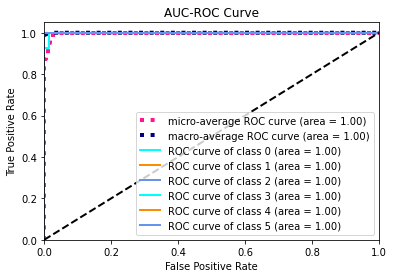

In [29]:
# Testing SVM
import matplotlib.pyplot as plt  
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Train classifier with selected features from the above random forest classifier and select model
X = df[selected_feat].to_numpy()
y = df['label'].to_numpy()

# Standardizing the features
X = StandardScaler().fit_transform(X)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = OneVsRestClassifier(SVC(random_state=42)).fit(X_train, y_train)

y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()


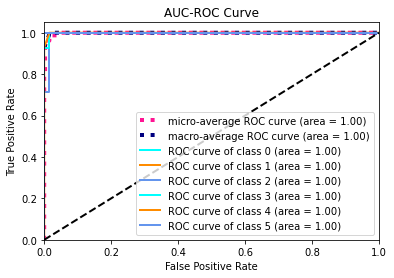

In [30]:
# Train classifier with selected features from the above random forest classifier and select model
X = df[selected_feat].to_numpy()
y = df['label'].to_numpy()

# Standardizing the features
X = StandardScaler().fit_transform(X)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = OneVsRestClassifier(RandomForestClassifier(random_state=0)).fit(X_train, y_train)

y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc="lower right")
plt.show()